# Demonstration of some Pandas capabilities using a famous concrete dataset

First, we are going to import some necessary libraries and to load the famous concrete dataset published by Yeh et al.
To save typing, we have created a tinyurl `tunyurl.com/icccm1` which contains a link to a `xls` file containing the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://tinyurl.com/icccm1"
df = pd.read_excel(url) 

df.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


We note that the column names are very long and contain some special characers. Therefore, we will manually rename the columns.

In [15]:
df.columns = ["cement", "bfs", "flyash", "water", "sp", "agg_coarse", "agg_fine", "age", "strength"]
df.head(3)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


## Different ways to select a column in Pandas
We now demonstrate how to select a column with Pandas. Note that the type of a column is a Pandas Series.

In [16]:

type(df.cement)


pandas.core.series.Series

A specific column, here the column containing the amount of cement can be selected using a dot notation like this:

In [6]:
df.cement


0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

Alternatively a notation with square brackets is also possible:

In [ ]:
df["cement"]


0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

It is also possible to use in indexed location based access. The `:` means that all rows are selected.

In [ ]:
df.iloc[:,0]

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

A name based selection is also possible

In [ ]:
col4 = df.loc[:,"cement"]

## Create a new column -- calculate the w/c value

In [20]:

df["wc"] = df["water"] / (df["cement"] + df["bfs"] + df["flyash"])
df.head(5)

# better to round off after the second decimal
df["wc"] = df["wc"].round(2)
df.head(5)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength,wc
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.58


In [22]:

df["wc_high"] = df["wc"] > 0.42
df.head(5)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength,wc,wc_high
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30,False
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30,False
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48,True
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48,True
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.58,True


In [ ]:

# check dtypes
df.dtypes



In [25]:


# count high wc instances
nr_high = df.wc_high.sum()


nr_high

np.int64(602)

In [26]:

# calculate the means
means = df.mean(numeric_only=True)

means


cement        281.165631
bfs            73.895485
flyash         54.187136
water         181.566359
sp              6.203112
agg_coarse    972.918592
agg_fine      773.578883
age            45.662136
strength       35.817836
wc              0.469233
wc_high         0.584466
dtype: float64

In [28]:


#%% 

# filter operations
df_high = df.query("wc_high > 0.42").copy()
df_high2 = df[df["wc_high"]]

df_high.head(3)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength,wc,wc_high
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48,True
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48,True
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.58,True


In [ ]:
# joining and dataframe creation
exp_names = ["a" + str(i) for i in df.index.values]
df["exp_code"] = exp_names

df.head(3)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength,wc,wc_high,exp_code
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30,False,a0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30,False,a1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48,True,a2


In [32]:

# create dummy data, fill random number between 1 and 100 for each experiment
additional_data = [np.random.randint(1, 101) for i,j in enumerate(exp_names)]
df2 = pd.DataFrame({"exp_code":exp_names, "new": additional_data})
df3 = pd.DataFrame({"exp":exp_names, "new": additional_data})

df2.head(3)

,exp_code,new
0,a0,93
1,a1,85
2,a2,51


In [33]:


# join by index
df_joined = df.join(df2, lsuffix="left")  ## CHECK
df_joined2 = pd.merge(df, df3, left_on="exp_code", right_on="exp")

df_joined.head(3)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength,wc,wc_high,exp_codeleft,exp_code,new
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30,False,a0,a0,93
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30,False,a1,a1,85
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48,True,a2,a2,51


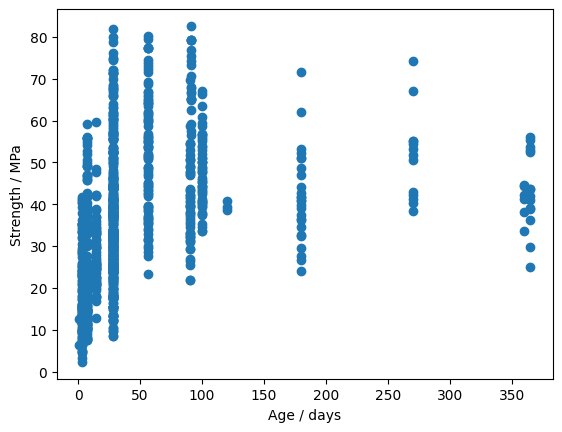

In [34]:


#%%

# exploratory data analysis

fig, ax = plt.subplots()
ax.scatter(df["age"], df["strength"])
ax.set_xlabel("Age / days")
ax.set_ylabel("Strength / MPa")
plt.show()


51


/tmp/ipykernel_8867/2819798622.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(["wc_bin"]):


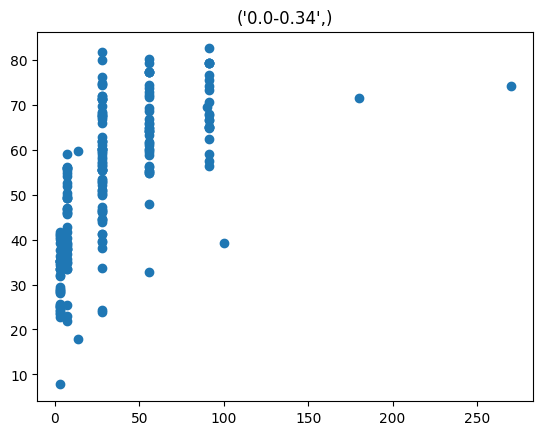

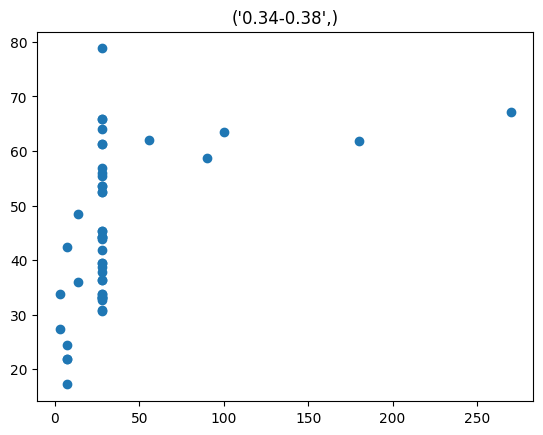

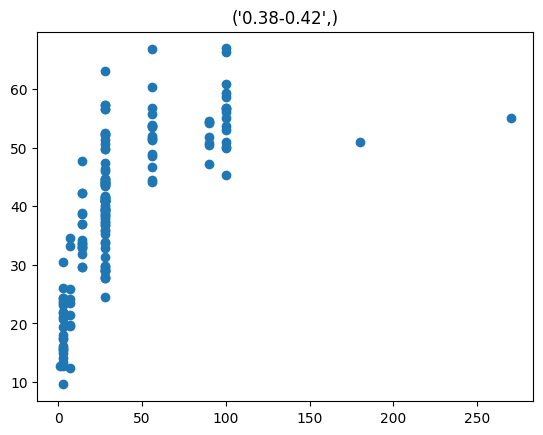

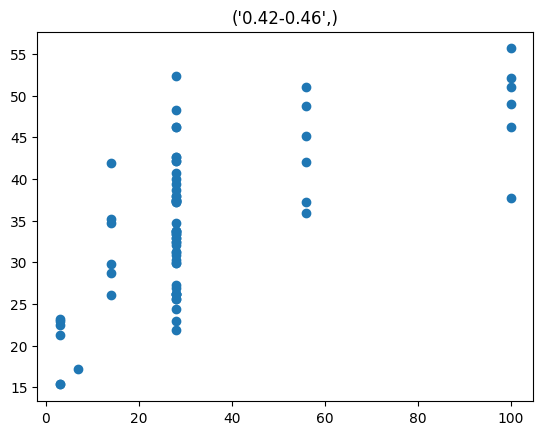

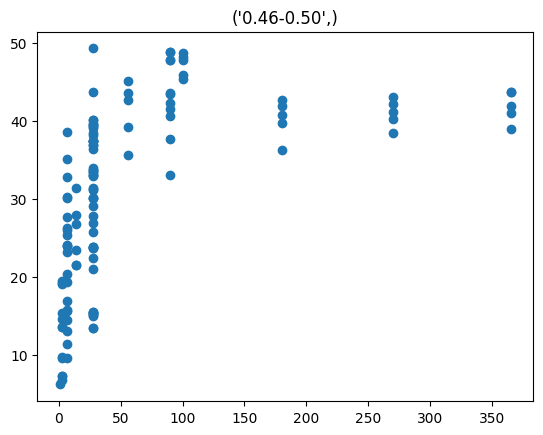

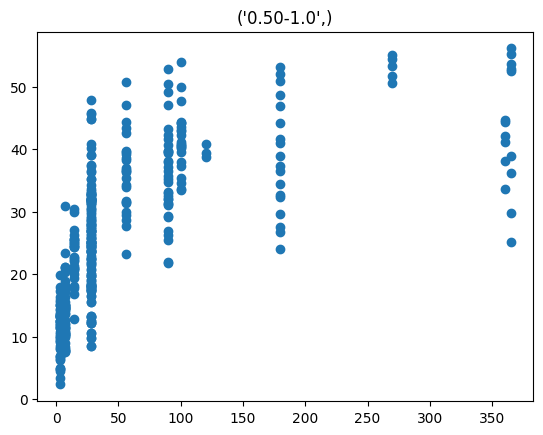

In [35]:

#%%

# groupby


# wc contains too many unique values
print(len(df.wc.unique()))

# create bins for w/c values

bins = [0, 0.34, 0.38, 0.42, 0.46, 0.50, 1]
labels = ["0.0-0.34", "0.34-0.38", "0.38-0.42", "0.42-0.46", "0.46-0.50", "0.50-1.0"]

df["wc_bin"] = pd.cut(df["wc"], bins=bins, labels = labels)

#%%

# loop over bins
for name, group in df.groupby(["wc_bin"]):
    fig, ax = plt.subplots()
    ax.scatter(group["age"], group["strength"])
    ax.set_title(name)
    plt.show()
    
#%% 


/tmp/ipykernel_8867/1737166998.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (name, group), ax in zip(df.groupby("wc_bin"), axs.flatten()):


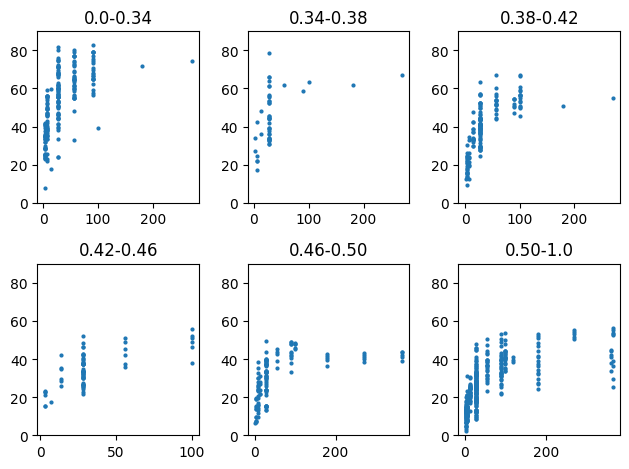

In [36]:

# demonstrate subplots
fig, axs = plt.subplots(2,3, layout="tight")

for (name, group), ax in zip(df.groupby("wc_bin"), axs.flatten()):
    ax.scatter(group["age"], group["strength"], s=4)
    ax.set_title(name)
    ax.set_ylim(0,90)
plt.show()


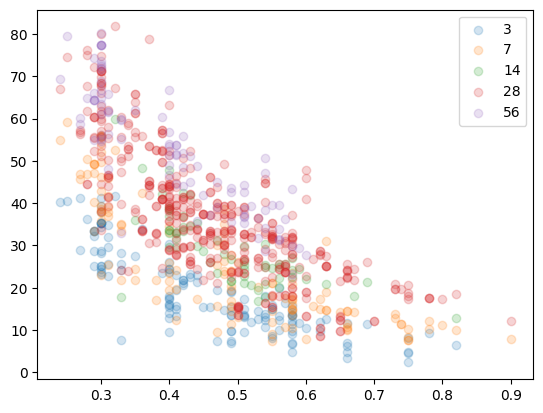

In [37]:


#%%

fig, ax = plt.subplots()

for name, group in df.query("age < 60 and age > 1").groupby("age"):
    ax.scatter(group["wc"], group["strength"], alpha =0.2, label=name)
plt.legend()
plt.show()



/tmp/ipykernel_8867/2910178056.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fits = df.query("age < 60 and age >1 and wc < 0.7 ").groupby("age").apply(lambda t: fit_exponential(t))


[]

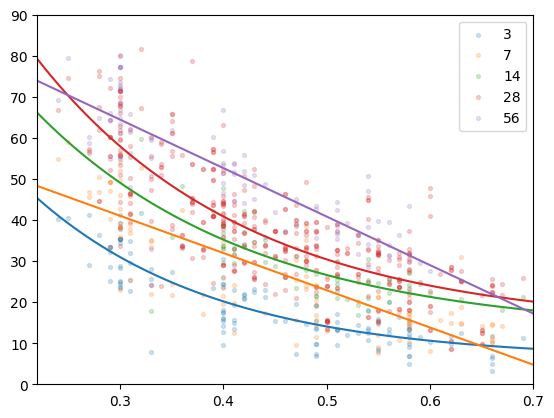

In [48]:

#%%

from scipy.optimize import curve_fit

# fit an exponential relation to the age groups of 

def exponential(x, a,b,c):
    return c + a * np.exp(-b*x)

def fit_exponential(df, xcol="wc", ycol="strength"):
    f = exponential
    popt, pcov = curve_fit(f, df[xcol], df[ycol], maxfev=10000)
    out = {"a": popt[0], "b": popt[1], "c": popt[2]}
    return pd.Series(out)

fits = df.query("age < 60 and age >1 and wc < 0.7 ").groupby("age").apply(lambda t: fit_exponential(t))

x = np.linspace(0.22, df.wc.max(),100)

fig, ax = plt.subplots()
for index, row in fits.iterrows():
    y = row["c"] + row["a"] * np.exp(-row["b"]*x)
    ax.plot(x,y)
for name, group in df.query("age < 60 and age > 1 and wc < 0.7").groupby("age"):
    ax.scatter(group["wc"], group["strength"], s=8, alpha =0.2, label=name)
ax.set_xlim(0.22, 0.7)
ax.set_ylim(0, 90)
plt.legend()
plt.plot()



In [47]:
fits

,a,b,c
age,,,
3,136.716801,5.674428,6.066211
7,-122767.895915,-0.000738,122836.126994
14,153.169631,4.780429,12.582658
28,192.667307,4.924017,13.985834
56,-51237.149353,-0.002303,51337.017874
